In [1]:
from keras import layers
from keras import models

# We are using a convnet since it is more effective than just dense layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 14ms/step - loss: 0.1815 - accuracy: 0.9433
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0487 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0191 - accuracy: 0.9944


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0410 - accuracy: 0.9883


In [5]:
print(test_acc)
history_dict = history.history
history_dict.keys()

0.9883000254631042


dict_keys(['loss', 'accuracy'])

In [6]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[7.8728454e-11 5.1681159e-10 2.1118051e-08 ... 1.0000000e+00
  1.2950774e-10 4.3999506e-09]
 [7.7614949e-08 9.8644859e-10 9.9999988e-01 ... 2.7432172e-13
  2.3681777e-09 1.9031280e-12]
 [1.5036322e-07 9.9997592e-01 4.4691005e-06 ... 9.9901445e-06
  3.5841495e-06 4.3328629e-07]
 ...
 [9.9109770e-17 7.7505580e-13 6.3332126e-12 ... 1.2031119e-08
  7.7648105e-12 7.2966230e-11]
 [3.6840153e-09 1.4554736e-11 5.5939112e-12 ... 6.5559710e-11
  1.6119289e-04 2.8364409e-12]
 [2.6580731e-08 4.9593486e-11 1.7709592e-08 ... 9.5430109e-16
  3.0980683e-08 1.3919465e-12]]
[7 2 1 ... 4 5 6]


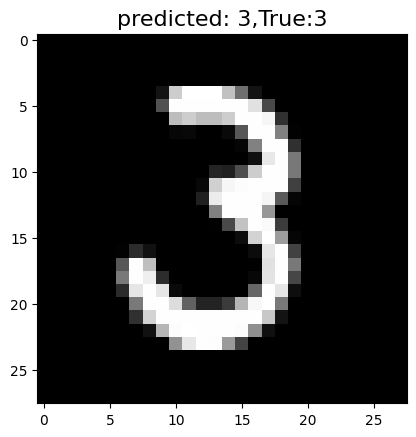

In [7]:
#single example
random_idx = np.random.choice(len(test_images))
x_sample = test_images[random_idx]
y_true = np.argmax(test_labels, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("predicted: {},True:{}".format(y_sample_pred_class, y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

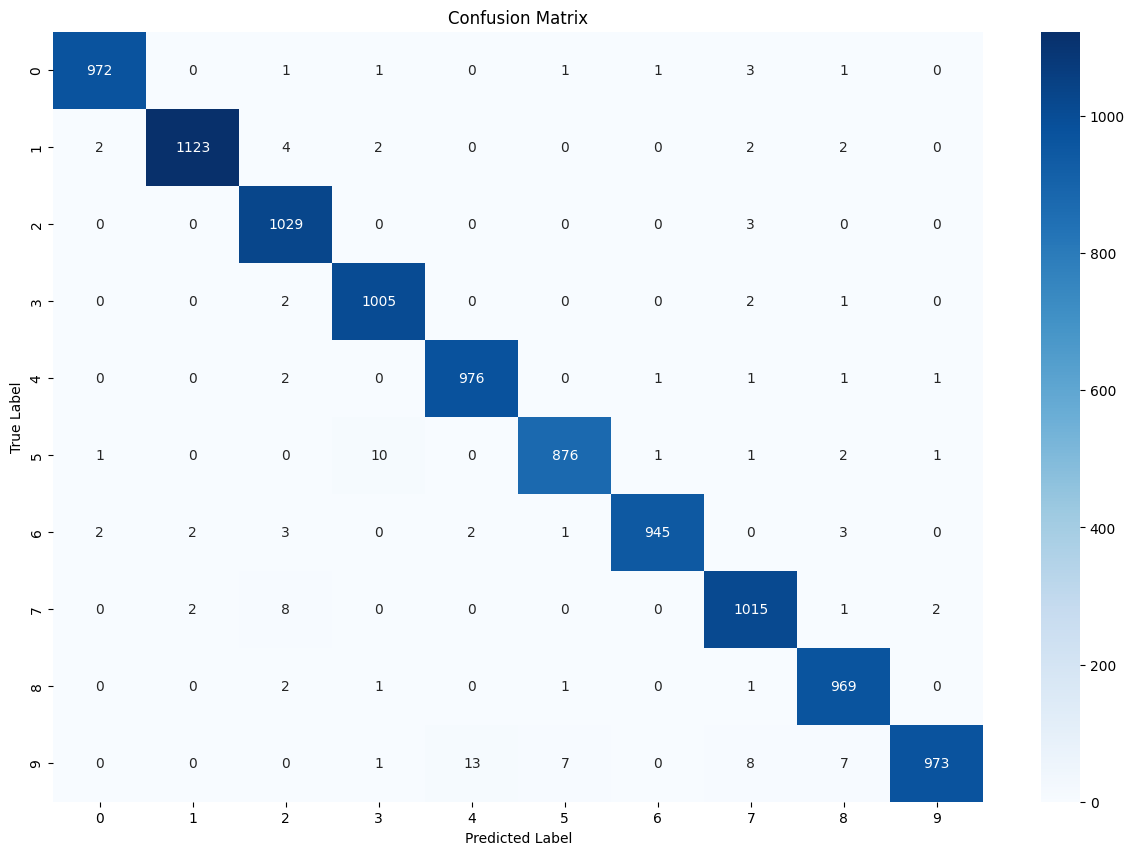

In [8]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d',ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [15]:
#Investigate errors
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = test_images[errors]

In [13]:


y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones
     


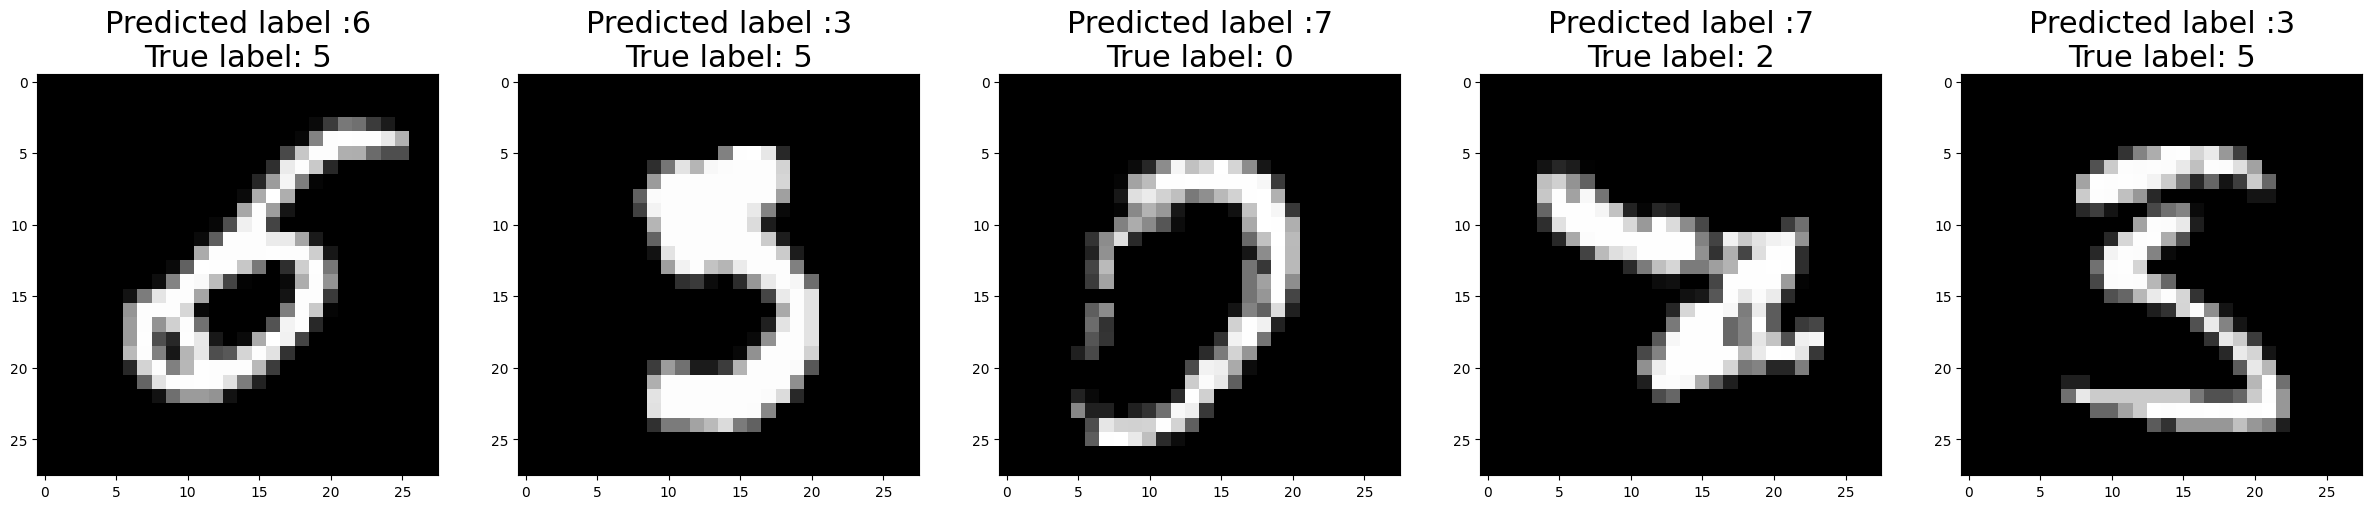

In [17]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)